<a href="https://colab.research.google.com/github/GitMishka/1/blob/main/sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import string


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Work/Survey/all_data.csv')

print(df.head())

def clean_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()
    return text

df['cleaned_Q2'] = df['Q2 - What can we do better?'].apply(clean_text)


<ipython-input-2-d32c1152fd31>:2: DtypeWarning: Columns (18,23,24,26,27,31,33,34,38,39,40,41,42,43,44,45,47,48,50,51,52,54,55,56,57,59,60,82,99,100,101,102,103,104,108,109,111,112,113,114,115,116,117,119,121,124,126,127,128,129,130,131,132,135,136,137,139,141,142,145,146,151,152,153,154) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/Work/Survey/all_data.csv')


  Survey Metadata - Start Date (+00:00 GMT)  \
0                           9/20/2023 17:57   
1                           9/20/2023 18:06   
2                           9/20/2023 17:56   
3                           9/20/2023 17:53   
4                           9/20/2023 18:03   

  Survey Metadata - End Date (+00:00 GMT) Survey Metadata - Response Type  \
0                         9/20/2023 21:28                      IP Address   
1                         9/20/2023 19:02                      IP Address   
2                         9/20/2023 18:15                      IP Address   
3                         9/20/2023 18:04                      IP Address   
4                         9/20/2023 18:05                      IP Address   

  Survey Metadata - IP Address  Survey Metadata - Progress  \
0               162.247.216.12                          50   
1               162.247.216.12                          50   
2               162.247.216.12                          50   
3     

In [ ]:
stopwords = [
    'nan', 'the', 'and', 'to', 'of', 'in', 'for', 'is', 'on', 'with', 'as', 'it', 'at',
    'this', 'that', 'but', 'be', 'are', 'a', 'we', 'have', 'not', 'i', 'they', 'our', 'or' , 'do', 'all',  'my', 'there', 'no', 'people', 'their', 'one'
]

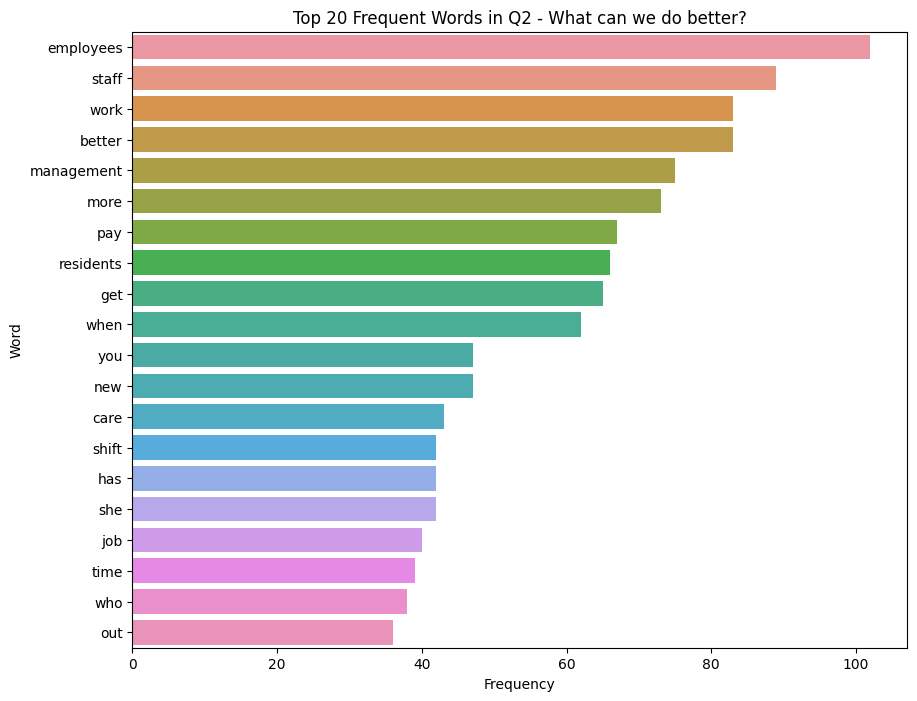

In [ ]:



words = ' '.join(df['cleaned_Q2']).split()
filtered_words = [word for word in words if word not in stopwords]
word_freq = Counter(filtered_words)
word_freq_df = pd.DataFrame(word_freq.most_common(20), columns=['Word', 'Frequency'])


plt.figure(figsize=(10,8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df)
plt.title('Top 20 Frequent Words in Q2 - What can we do better?')
plt.show()



In [ ]:
stopwords = [
    'nan', 'the', 'and', 'to', 'of', 'in', 'for', 'is', 'on', 'with', 'as', 'it', 'at',
    'this', 'that', 'but', 'be', 'are', 'a', 'we', 'have', 'not', 'i', 'they', 'our', 'or' , 'do', 'all',  'my', 'there', 'no', 'people', 'their', 'one'
]

In [ ]:

from collections import defaultdict



In [ ]:
def get_word_context(target_word, words, window=1):
    context = defaultdict(int)

    for i, word in enumerate(words):
        if word == target_word:
            if i - window >= 0:
                context[words[i - window]] += 1
            if i + window < len(words):
                context[words[i + window]] += 1

    sorted_context = dict(sorted(context.items(), key=lambda item: item[1], reverse=True))
    return sorted_context

context_data = {}
for word in top_words:
    context_data[word] = get_word_context(word, filtered_words)

for word in top_words[:3]:
    print(f"Word: {word}")
    print("Context:")
    for context_word, freq in context_data[word].items():
        print(f"{context_word}: {freq}")
    print("\n")


Word: employees
Context:
better: 7
more: 6
new: 5
when: 5
who: 5
other: 4
disgruntled: 4
your: 4
good: 4
her: 3
great: 3
treat: 3
residents: 3
enough: 2
without: 2
see: 2
just: 2
certain: 2
lost: 2
feeling: 2
compassion: 2
many: 2
keep: 2
respect: 2
make: 2
how: 2
being: 2
following: 2
listen: 2
heart: 2
expected: 1
take: 1
insensitive: 1
taking: 1
help: 1
aren’t: 1
management: 1
attitudes: 1
pay: 1
actual: 1
meet: 1
example: 1
hard: 1
worked: 1
much: 1
seasoned: 1
having: 1
every: 1
29: 1
possibly: 1
32: 1
disappointed: 1
lot: 1
dependable: 1
find: 1
building: 1
shells: 1
bc: 1
coming: 1
vesting: 1
doesnt: 1
give: 1
job: 1
about: 1
its: 1
per: 1
like: 1
which: 1
displeased: 1
vested: 1
serious: 1
get: 1
present: 1
maybe: 1
staffing: 1
between: 1
matter: 1
frequent: 1
out: 1
things: 1
compared: 1
workers: 1
need: 1
than: 1
convenient: 1
mcdonalds: 1
loss: 1
frustrating: 1
mini: 1
resign: 1
speak: 1
leave: 1
don’t: 1
classes: 1
fall: 1
youre: 1
march: 1
these: 1
rogue: 1
very: 1
control